## Visual Analytics and Agglomerate Clustering 

#### Dataset Information

Columns description:

CustomerID - Unique ID assigned to the customer

Gender - Gender of the customer

Age - Age of the customer

Annual Income (k$) - Annual Income of the customer

Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature



In [4]:
# Importing the Required Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import plotting
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')

In [5]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [6]:
# importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [7]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [10]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Histograms

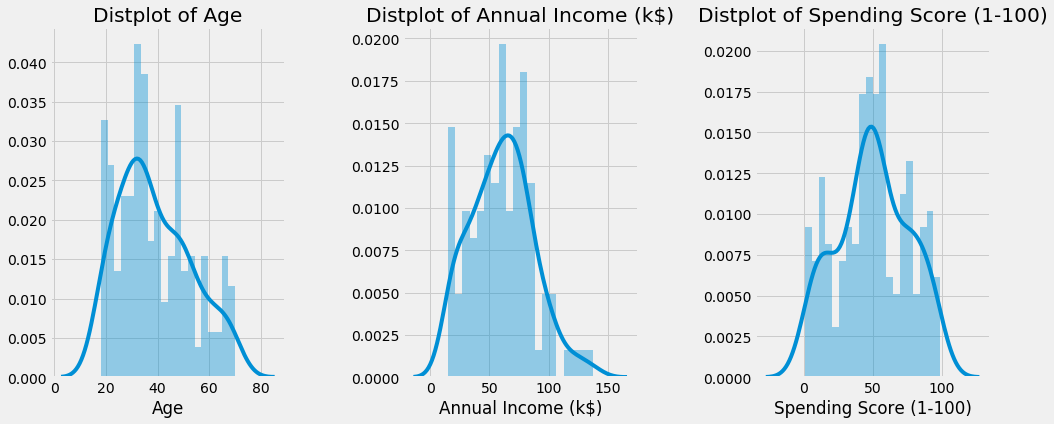

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

#### Count Plot of Gender

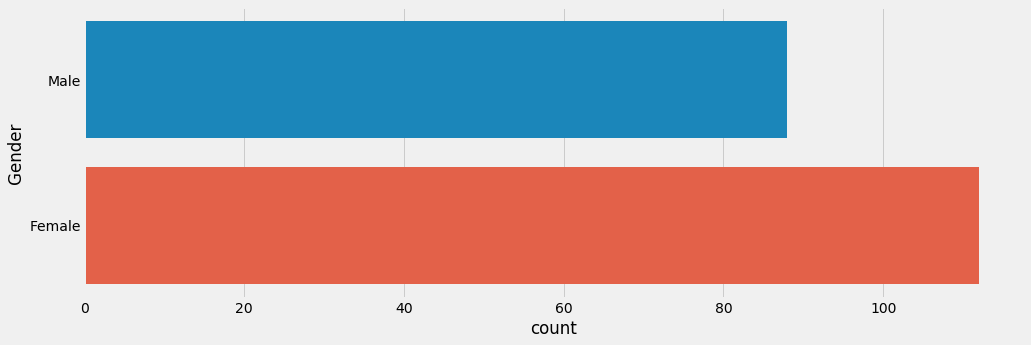

In [14]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = dataset)
plt.show()

#### Ploting the Relation between Age , Annual Income and Spending Score

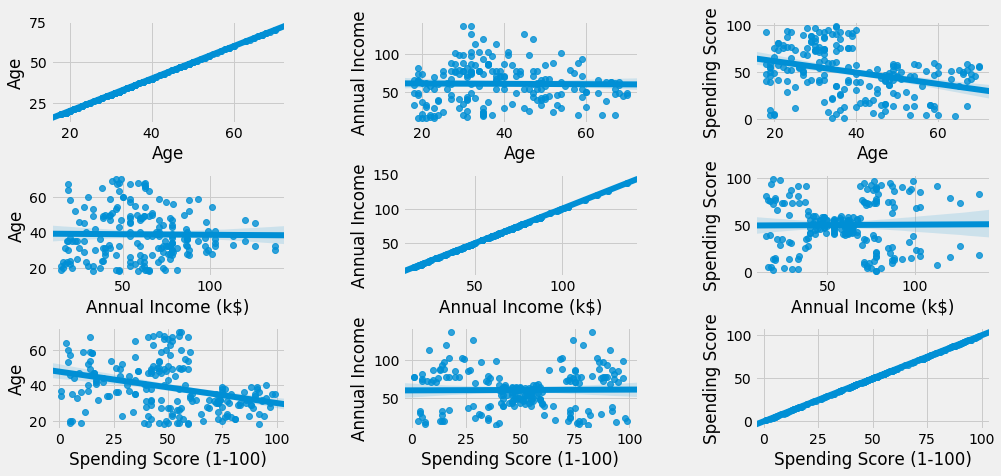

In [15]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

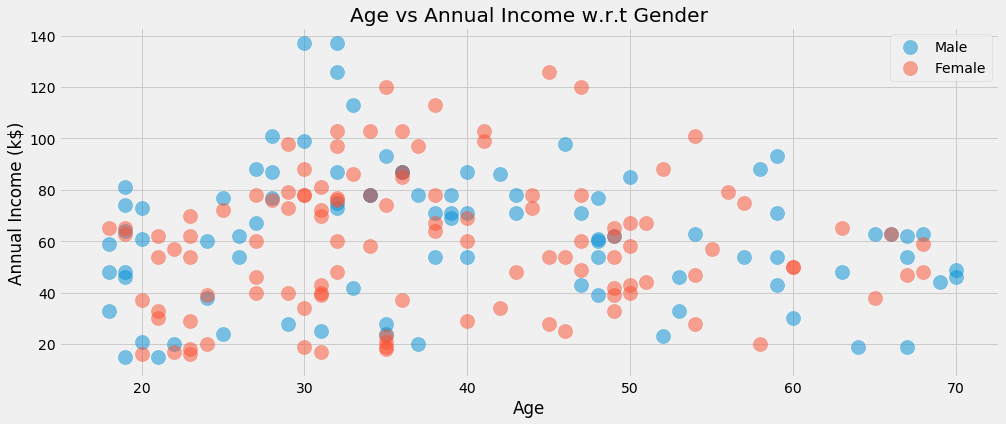

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

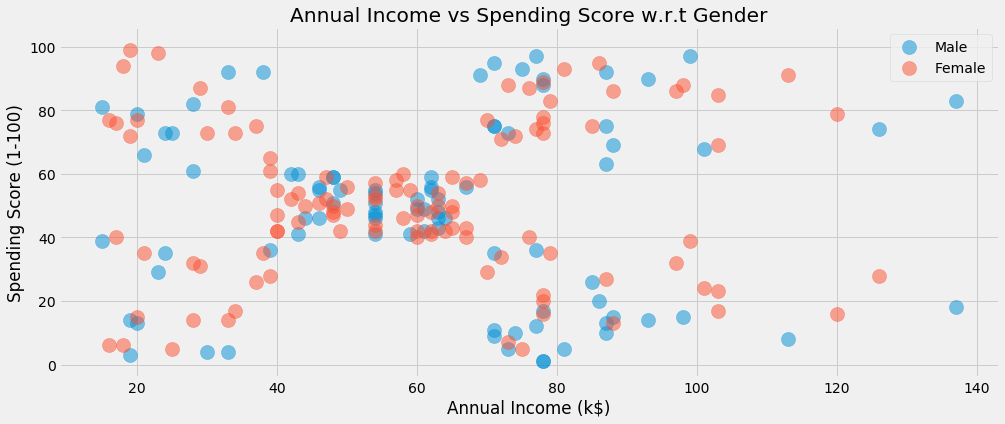

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = dataset[dataset['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

#### Distribution of values in Age , Annual Income and Spending Score according to Gender

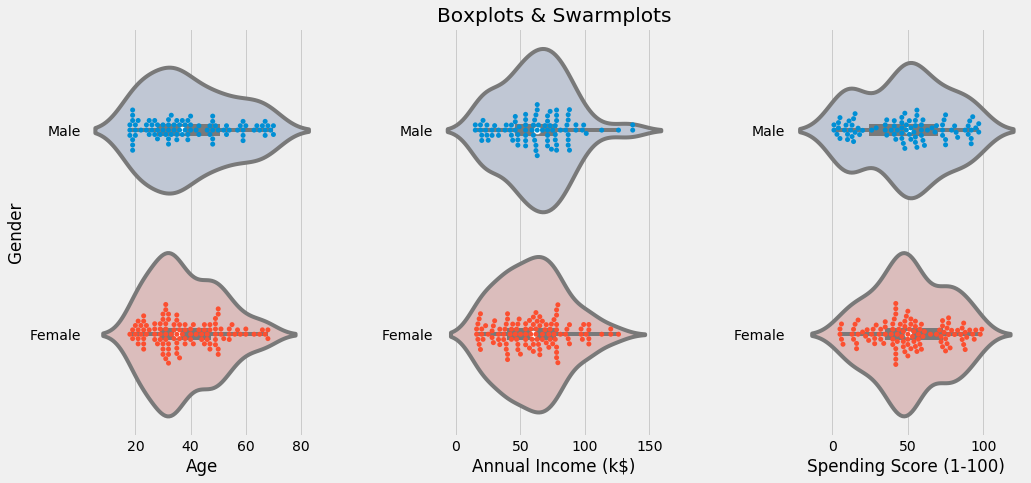

In [18]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = dataset , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = dataset)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K- Means


### 1.Segmentation using Age and Spending Score

In [19]:
'''Age and spending Score'''
X1 = dataset[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

#### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

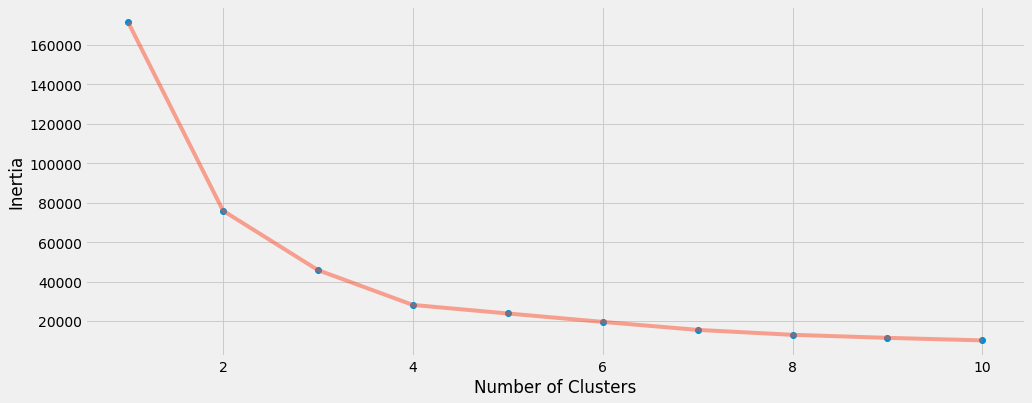

In [20]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [21]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [22]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

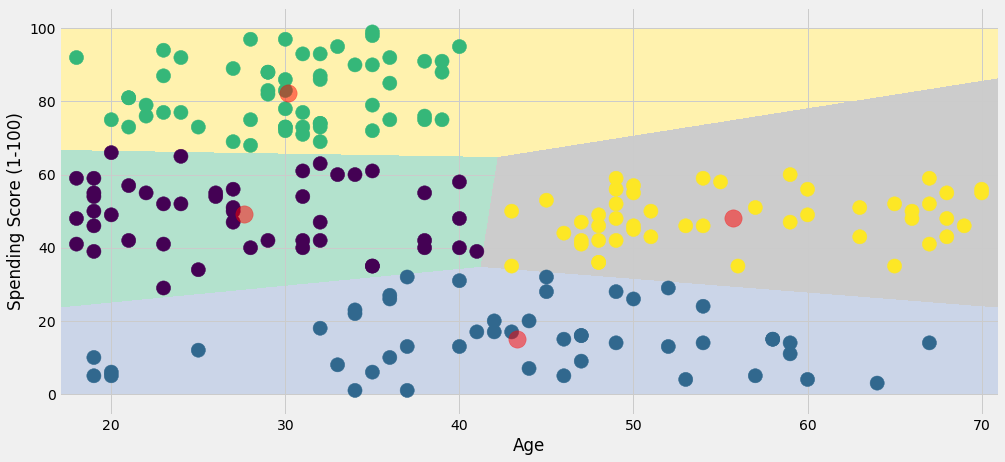

In [23]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = dataset , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


### 2. Segmentation using Annual Income and Spending Score

In [39]:
'''Annual Income and spending Score'''
X2 = dataset[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

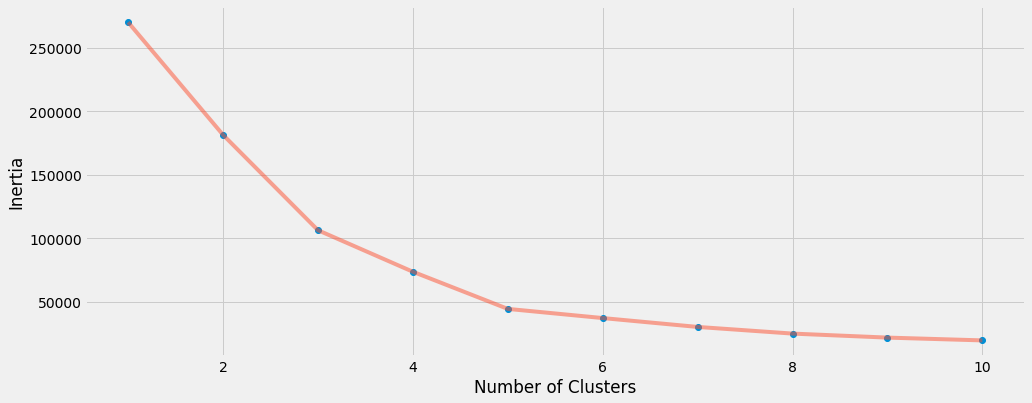

In [40]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [41]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

### 3.Segmentation using Age , Annual Income and Spending Score

In [32]:
X3 = dataset[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

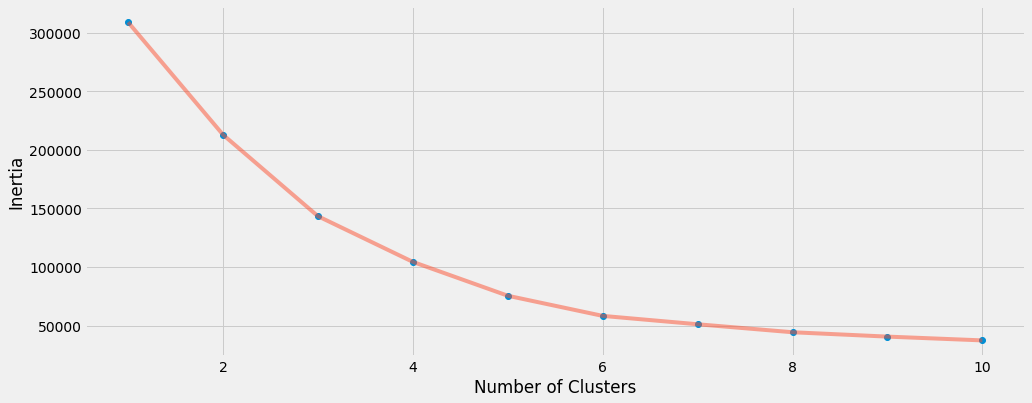

In [33]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [34]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [38]:
dataset['label3'] =  labels3
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['label3'], 
        size= 20,
        line=dict(
            color= dataset['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


## Other Customer Data Segmentation Tasks

In [1]:
import sklearn
from sklearn.decomposition import PCA as PCA
from sklearn.metrics import silhouette_samples

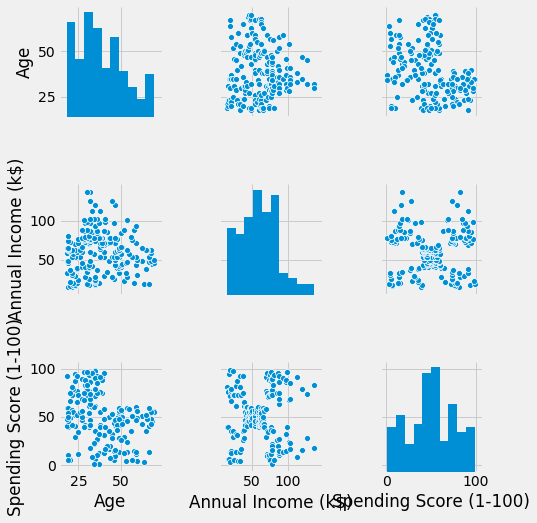

In [8]:
sns.pairplot(dataset[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]);

What we can see? Annual Income with Spending Score forms together an interesting picture, look at it later. Age and Annual Income distribution don't seems like normal. They are both shifted to left. Spending Score, at first glance, has too large tails to be normal. But remember, that these conclusions based on histograms, and they can change very high by switch number of bins. So, plot in addition kdeplot from seaborn:

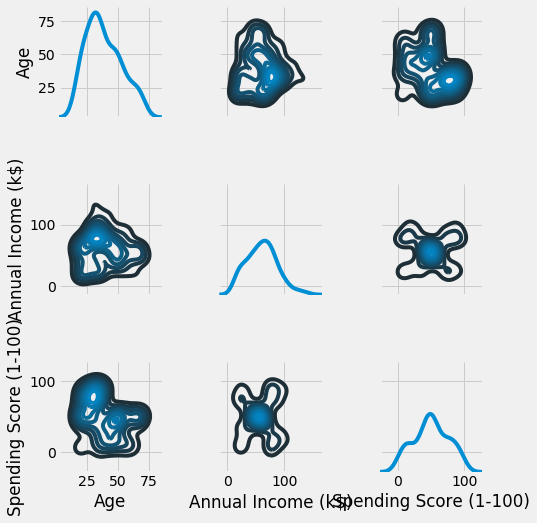

In [10]:
g = sns.PairGrid(dataset[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=8);

Now analyze Categorical Columns- gender with other features.

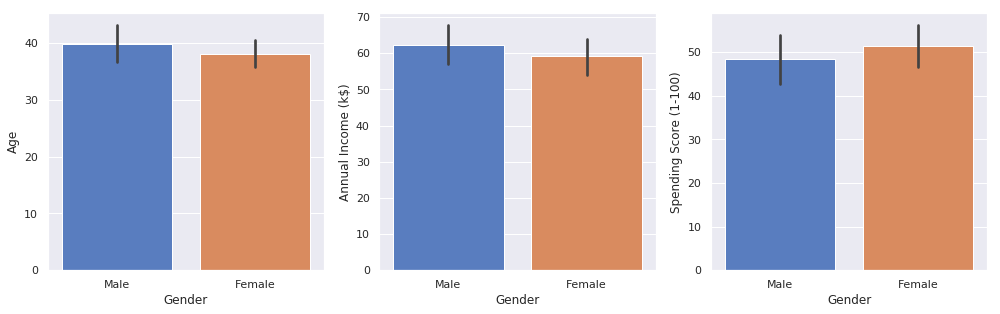

In [26]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Gender', data=dataset);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Gender', data=dataset);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Gender', data=dataset);

Good news, gender feature is balace with all another features! It's really interesting. So the model will be more objective. Perhaps, gender feature can be don't useable, but we have so few features. And I can't drop it out of analysis.

## Let's start to visualize. Firstly with PCA:

In [44]:
data_mod= dataset.drop(['CustomerID'], axis=1)
data_mod['Gender'] = data_model['Gender'].factorize()[0]
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Columns description:

CustomerID - Unique ID assigned to the customer

Gender - Gender of the customer

Age - Age of the customer

Annual Income (k$) - Annual Income of the customee

Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature


So, drop non-informative ordinal data - CustomerID and consider pairplot for all columns:



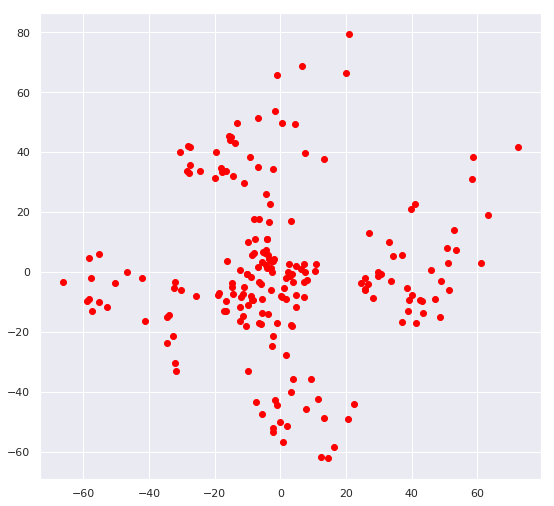

In [47]:
pca = PCA(n_components=2)
pca.fit(data_mod)
Xpca = pca.transform(data_mod)
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(Xpca[:,0],Xpca[:,1], c='red')
plt.show()

We can see that algorithm well caught relation between Annual Income and Spending Score. Before clustering try another interesting method - tsne:

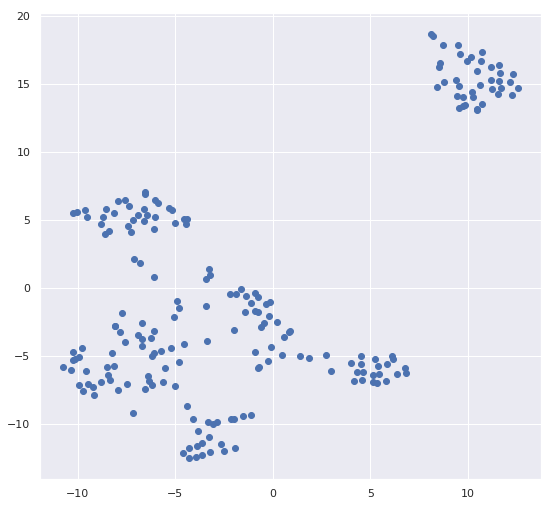

In [48]:
from sklearn.manifold import TSNE
tsn = TSNE()
res_tsne = tsn.fit_transform(data_mod)
plt.figure(figsize=(8,8))
plt.scatter(res_tsne[:,0],res_tsne[:,1]);

This method gives us structure with one strongly remote cluster. But now we can't clearly talk how many clusters need model? After PCA - 5 clusters and after tsne? 5 or 6? Apply some cluster methods and find this out.

After PCA we can apply k-means, because groups are roughly homogeneous and uniform. But the same can not be said about tsne data.

In [19]:
from sklearn.cluster import AgglomerativeClustering as AggClus

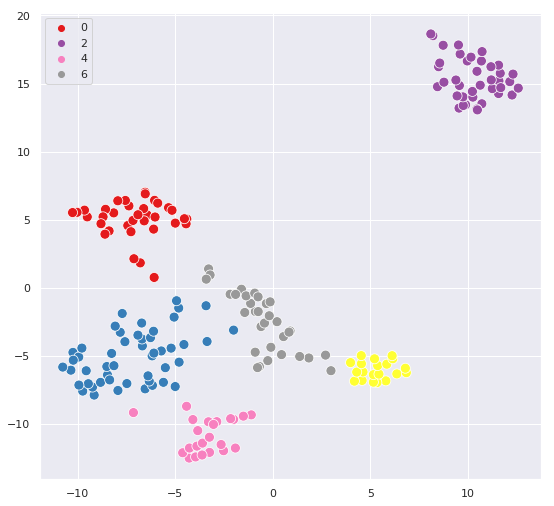

In [49]:
clus_mod = AggClus(n_clusters=6)
assign = clus_mod.fit_predict(data_mod)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='Set1');

### Is it optimal clusters number? Consider dendrogramm:

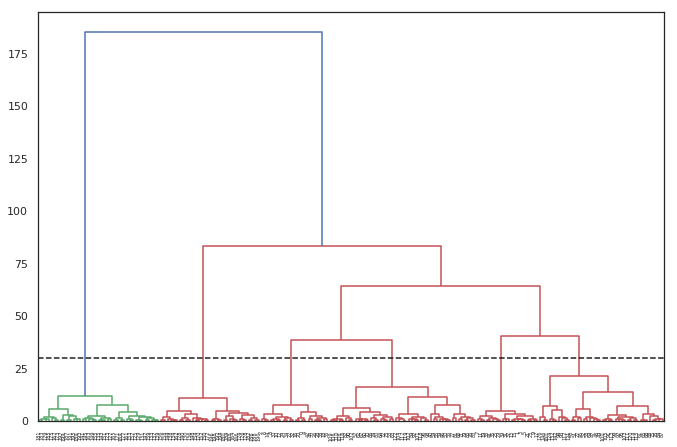

In [50]:
from scipy.cluster.hierarchy import dendrogram, ward
sns.set(style='white')
plt.figure(figsize=(10,7))
link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [30,30],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

It seems that optimal are 6 clusters. Of course, nothing can be said sure for clustering. You can say that there are 3, 4, 5 or 7 clusters. There is no ready solution, as often happens in data analysis. So, rewrite code:

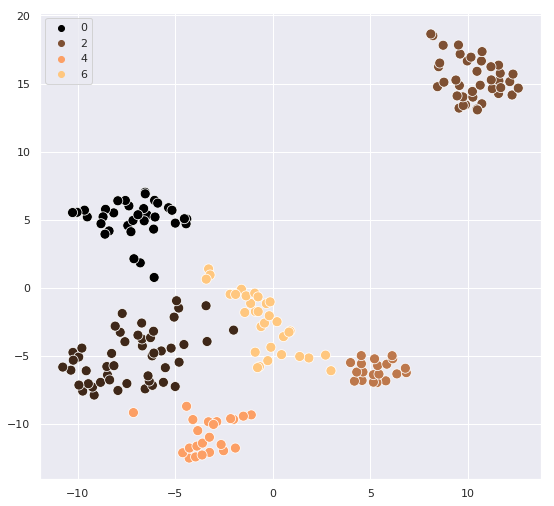

In [51]:
clus_mod = AggClus(n_clusters=6)
assign = clus_mod.fit_predict(data_mod)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='copper');

Okay, now I will see what data got into clusters.

In [52]:
data_mod['predict'] = pd.DataFrame(assign)

In [53]:
data_mod.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4


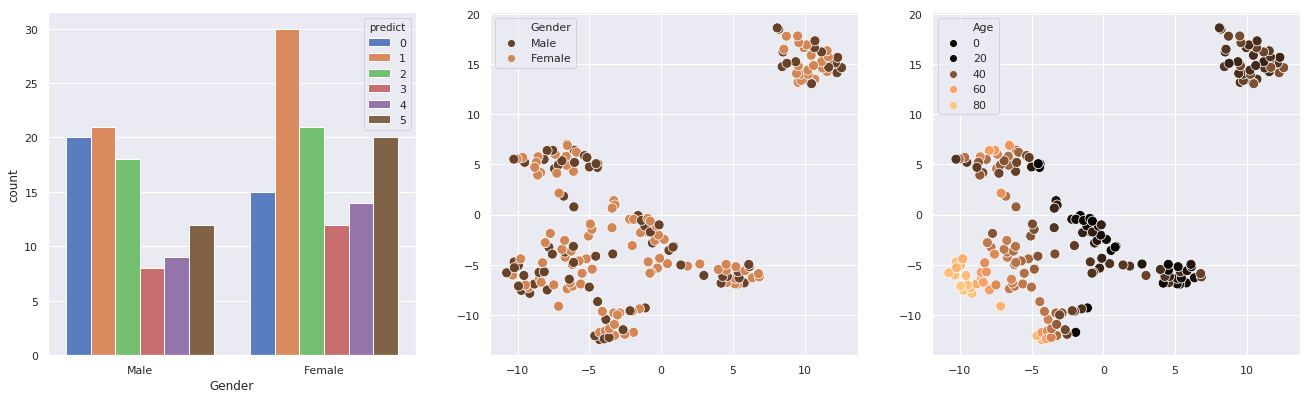

In [54]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.countplot(dataset['Gender'],hue=data_mod['predict']);
ax2 = fig.add_subplot(3,3,2)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Gender'], palette='copper');
ax3 = fig.add_subplot(3,3,3)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Age'], palette='copper');

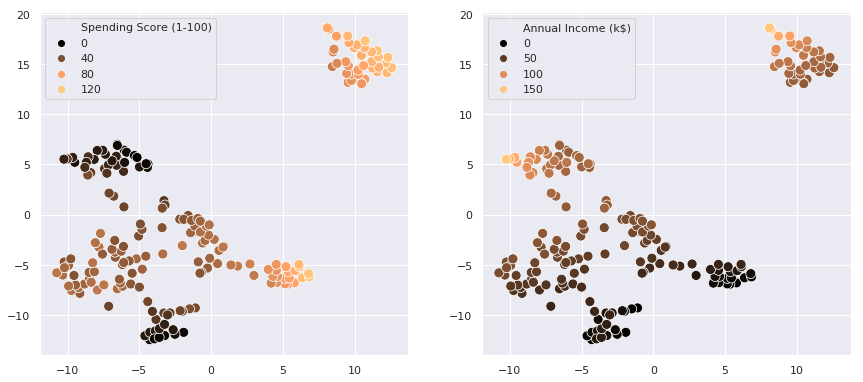

In [55]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Spending Score (1-100)'], palette='copper');
ax2 = fig.add_subplot(3,3,2)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Annual Income (k$)'], palette='copper');

Here we can see that except gender (I already mentioned this) other features gives significant results.



In [57]:
model = pd.DataFrame()
model['age'] = data_mod['Age'].groupby(data_model['predict']).median()
model['annual income'] = data_mod['Annual Income (k$)'].groupby(data_mod['predict']).median()
model['spending score'] = data_mod['Spending Score (1-100)'].groupby(data_mod['predict']).median()
model.reset_index(inplace=True)

In this task we have very rare chance of a two-dimensional data view. We use this to build a silhouette graphics. This graphic show clustering quality.

Text(0.5, 0, 'Silhouette coefficient')

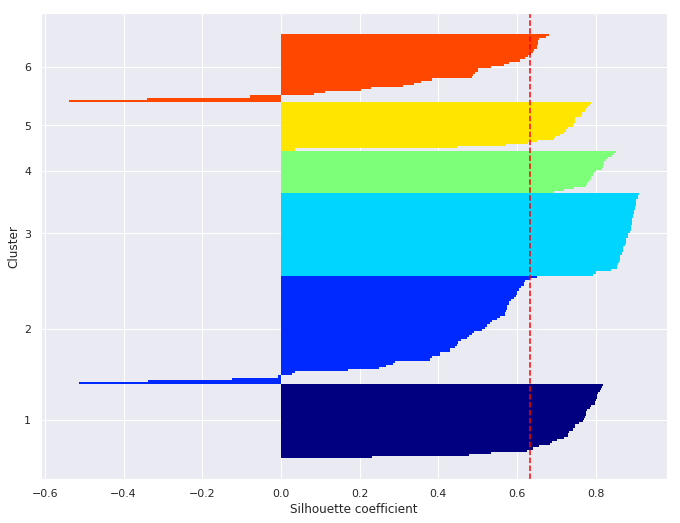

In [59]:
from matplotlib import cm
cluster_labels=np.unique(assign)
n_clusters = len(np.unique(assign))
silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(10,8))
for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel ('Cluster')
plt.xlabel('Silhouette coefficient')


Frankly, this clustering schedule doesn't look perfect. But we can compare it with another variants:

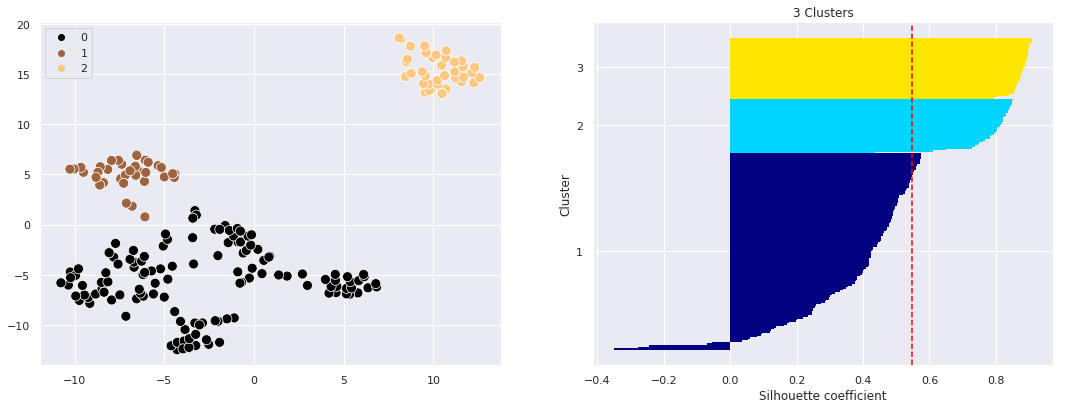

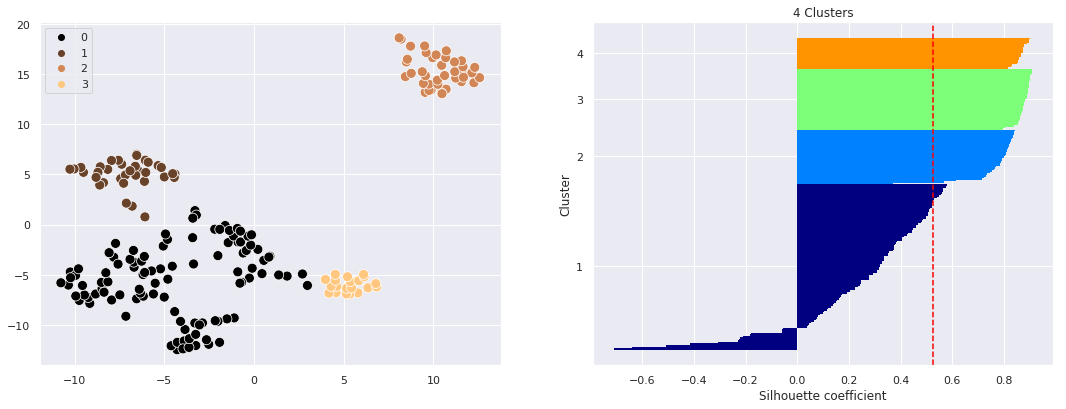

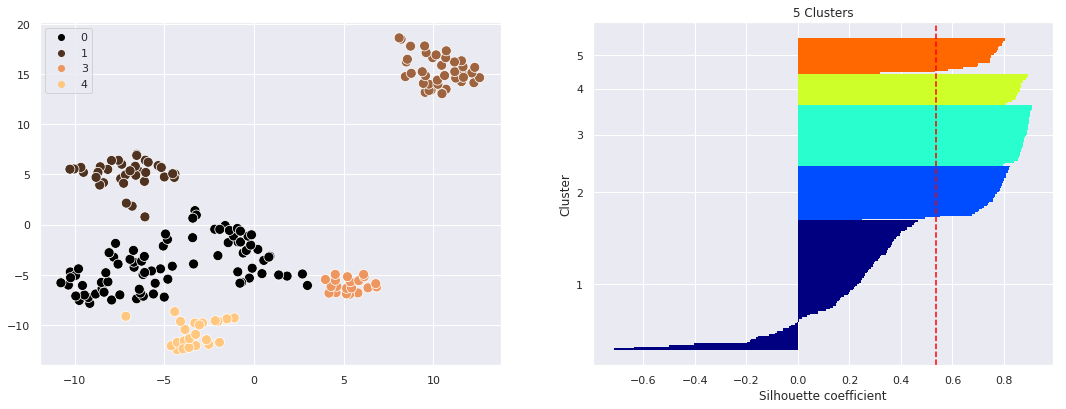

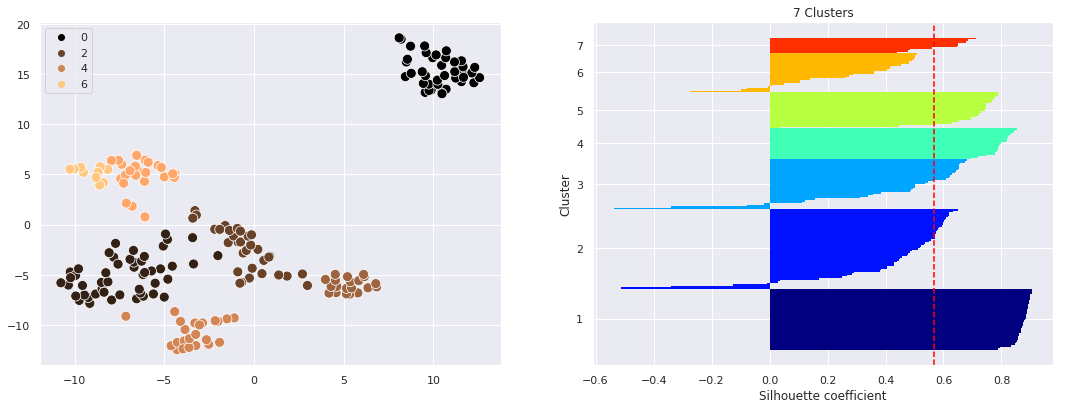

In [60]:
def clust_sill(num):
    fig = plt.figure(figsize=(25,20))
    ax1 = fig.add_subplot(3,3,1)

    clus_mod = AggClus(n_clusters=num)
    assign = clus_mod.fit_predict(data_model)
    sns.set(style='darkgrid',palette='muted')
    cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
    sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='copper');
    cluster_labels=np.unique(assign)
    n_clusters = len(np.unique(assign))
    silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    ax2 = fig.add_subplot(3,3,2)
    for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    
    plt.title(str(num)+ ' Clusters')
    plt.axvline(silhouette_avg,color="red",linestyle= "--")
    plt.yticks(yticks , cluster_labels + 1)
    plt.ylabel ('Cluster')
    plt.xlabel('Silhouette coefficient')
clust_sill(3)
clust_sill(4)
clust_sill(5)
clust_sill(7)


You may notice that my choice of 6 clusters seems optimal in this dataset.

Here you can see characteristics (median) of every cluster:

In [62]:
model

,predict,age,annual income,spending score
0,0,32,85.0,16.0
1,1,46,54.0,49.0
2,2,41,79.0,83.0
3,3,23,23.5,78.0
4,4,46,25.0,17.0
5,5,43,55.5,51.5


Consider clusters distributions. With boxplot graphics we can see that groups are very different.

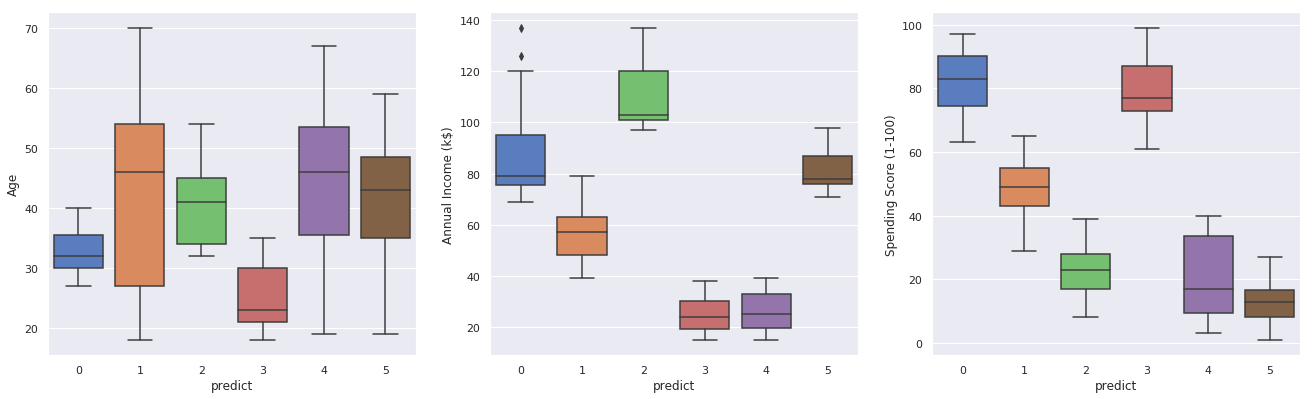

In [63]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.boxplot(y='Age',x='predict',data=data_model);
ax2 = fig.add_subplot(3,3,2)
sns.boxplot(y='Annual Income (k$)',x='predict',data=data_model);
ax3 = fig.add_subplot(3,3,3)
sns.boxplot(y='Spending Score (1-100)',x='predict',data=data_model);